In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/hana1/project1/data/train_outlier_drop2.csv', index_col = 0) # 20*28
df_train.head(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,1,809.98,31.377862,268.0,0,49.574949,199.458074,5,223.451310,0
5,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,8.0,...,1,809.98,27.262259,270.0,0,49.574949,62.430172,1,340.479212,0
6,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,22.537593,271.0,0,49.574949,178.344067,5,244.565317,0
7,8,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,1,809.98,23.933795,270.0,0,49.574949,24.785217,1,358.124168,2
8,1,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,24.464031,319.0,0,18.816215,104.291825,5,470.690627,2
9,2,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,7.0,...,1,605.03,38.550848,320.0,0,18.816215,40.391238,0,484.591214,0
11,4,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,39.182656,322.0,0,18.816215,99.306228,4,465.676224,0
12,5,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,34.977895,323.0,0,18.816215,130.115420,5,444.867032,0
13,6,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,33.381010,324.0,0,18.816215,43.477190,0,481.505262,0
14,7,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,...,1,605.03,31.131702,325.0,0,18.816215,70.101774,1,464.880678,0


# Annual_Income

In [ ]:
# 20000~160000

# Annual_Income1 : 120000 ~ 44999
# Annual_Income2 : 55000 ~ 89999
# Annual_Income3 : 90000 ~ 124999
# Annual_Income4 : 125000 ~ 160000

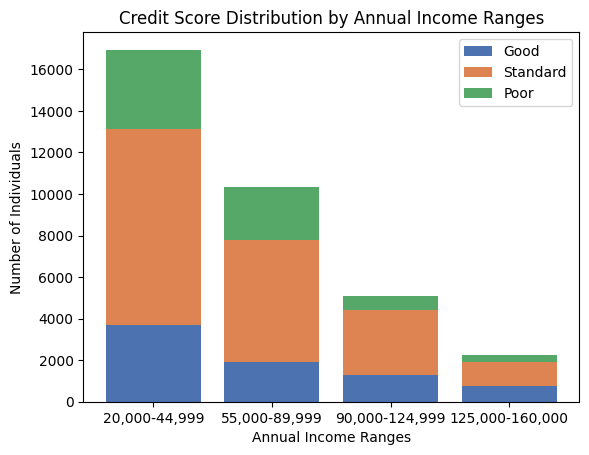

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Annual_Income'이 특정 범위에 해당하는 데이터를 필터링하여 4개의 데이터셋 생성
Annual_Income1_data = df_train[(df_train['Annual_Income'] >= 20000) & (df_train['Annual_Income'] <= 44999)]
Annual_Income2_data = df_train[(df_train['Annual_Income'] >= 55000) & (df_train['Annual_Income'] <= 89999)]
Annual_Income3_data = df_train[(df_train['Annual_Income'] >= 90000) & (df_train['Annual_Income'] <= 124999)]
Annual_Income4_data = df_train[(df_train['Annual_Income'] >= 125000) & (df_train['Annual_Income'] <= 160000)]

# 각 데이터셋에서 'good', 'standard', 'poor'로 데이터 분류 및 개수 측정
def categorize_credit_score(df_train):
    good_data = df[df['Credit_Score'] == 0]
    standard_data = df[df['Credit_Score'] == 2]
    poor_data = df[df['Credit_Score']==1]
    return len(good_data), len(standard_data), len(poor_data)

good_counts = []
standard_counts = []
poor_counts = []

# 열의 값이 0인 경우를 'good', 값이 2인 경우를 'standard', 값이 1인 경우를 'poor'로 분류합니다.
#그리고 해당 범주들의 개수를 세어 'good_counts', 'standard_counts', 'poor_counts'에 저장
for df in [Annual_Income1_data, Annual_Income2_data, Annual_Income3_data, Annual_Income4_data]:
    good, standard, poor = categorize_credit_score(df_train)
    good_counts.append(good)
    standard_counts.append(standard)
    poor_counts.append(poor)

#'income_ranges'에는 'Annual_Income'의 범주들을, 'good_counts', 'standard_counts', 'poor_counts'에는 각 범주에 해당하는 개수를 입력합니다.
#'plt.bar'를 통해 각 범주별로 데이터를 그리고, 'bottom' 옵션을 이용하여 이전 범주들의 높이만큼 밑으로 내려 그려줍니다.
# stack bar 그래프 그리기
income_ranges = ['20,000-44,999', '55,000-89,999', '90,000-124,999', '125,000-160,000']
labels = ['Good', 'Standard', 'Poor']

plt.bar(income_ranges, good_counts, label='Good')
plt.bar(income_ranges, standard_counts, bottom=good_counts, label='Standard')
plt.bar(income_ranges, poor_counts, bottom=[i+j for i, j in zip(good_counts, standard_counts)], label='Poor')

plt.xlabel('Annual Income Ranges')
plt.ylabel('Number of Individuals')
plt.title('Credit Score Distribution by Annual Income Ranges')
plt.legend()
plt.show()

# age

In [ ]:
df_train['Age'].describe()

count    49652.000000
mean        33.719065
std         10.921639
min         14.000000
25%         25.000000
50%         33.000000
75%         42.000000
max         56.000000
Name: Age, dtype: float64

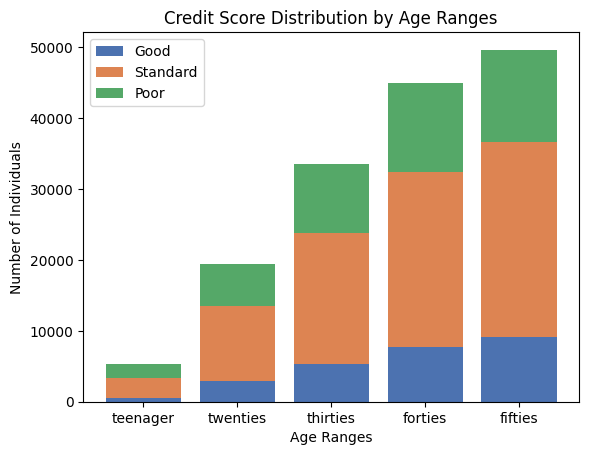

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Age1_data = df_train[df_train['Age'] < 20]
Age2_data = df_train[df_train['Age'] < 30]
Age3_data = df_train[df_train['Age'] < 40]
Age4_data = df_train[df_train['Age'] < 50]
Age5_data = df_train[df_train['Age'] < 60]

def categorize_credit_score(df_train):
    good_data = df[df['Credit_Score'] == 0]
    standard_data = df[df['Credit_Score'] == 2]
    poor_data = df[df['Credit_Score']==1]
    return len(good_data), len(standard_data), len(poor_data)

good_counts = []
standard_counts = []
poor_counts = []

for df in [Age1_data, Age2_data, Age3_data, Age4_data, Age5_data]:
    good, standard, poor = categorize_credit_score(df_train)
    good_counts.append(good)
    standard_counts.append(standard)
    poor_counts.append(poor)

# 나이 14~56세
# stack bar 그래프 그리기
income_ranges = ['teenager', 'twenties', 'thirties', 'forties', 'fifties']
labels = ['Good', 'Standard', 'Poor']

plt.bar(income_ranges, good_counts, label='Good')
plt.bar(income_ranges, standard_counts, bottom=good_counts, label='Standard')
plt.bar(income_ranges, poor_counts, bottom=[i+j for i, j in zip(good_counts, standard_counts)], label='Poor')

plt.xlabel('Age Ranges')
plt.ylabel('Number of Individuals')
plt.title('Credit Score Distribution by Age Ranges')
plt.legend()
plt.show()

# Total_EMI_per_month

In [ ]:
df_train['Total_EMI_per_month'].describe()

count    49652.000000
mean        82.319596
std         76.784939
min          0.000000
25%         25.029841
50%         57.786505
75%        121.347992
max        332.250015
Name: Total_EMI_per_month, dtype: float64

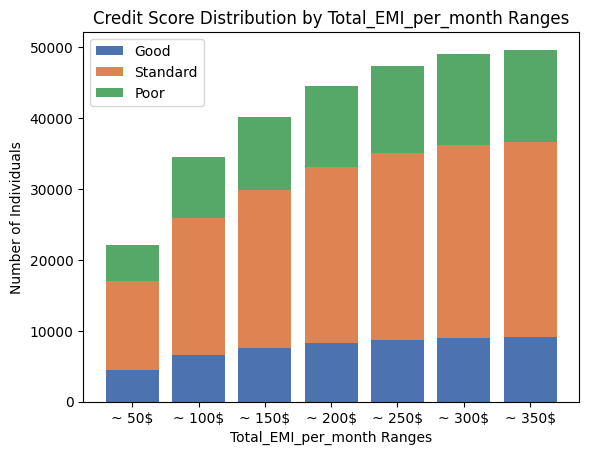

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Total_EMI_per_month1_data = df_train[df_train['Total_EMI_per_month'] < 50]
Total_EMI_per_month2_data = df_train[df_train['Total_EMI_per_month'] < 100]
Total_EMI_per_month3_data = df_train[df_train['Total_EMI_per_month'] < 150]
Total_EMI_per_month4_data = df_train[df_train['Total_EMI_per_month'] < 200]
Total_EMI_per_month5_data = df_train[df_train['Total_EMI_per_month'] < 250]
Total_EMI_per_month6_data = df_train[df_train['Total_EMI_per_month'] < 300]
Total_EMI_per_month7_data = df_train[df_train['Total_EMI_per_month'] < 350]

def categorize_credit_score(df_train):
    good_data = df[df['Credit_Score'] == 0]
    standard_data = df[df['Credit_Score'] == 2]
    poor_data = df[df['Credit_Score']==1]
    return len(good_data), len(standard_data), len(poor_data)

good_counts = []
standard_counts = []
poor_counts = []

for df in [Total_EMI_per_month1_data, Total_EMI_per_month2_data, Total_EMI_per_month3_data, Total_EMI_per_month4_data, Total_EMI_per_month5_data, Total_EMI_per_month6_data, Total_EMI_per_month7_data]:
    good, standard, poor = categorize_credit_score(df_train)
    good_counts.append(good)
    standard_counts.append(standard)
    poor_counts.append(poor)

# 0 ~ 332.250015
# stack bar 그래프 그리기
income_ranges = ['~ 50$', '~ 100$', '~ 150$', '~ 200$', '~ 250$', '~ 300$', '~ 350$']
labels = ['Good', 'Standard', 'Poor']

plt.bar(income_ranges, good_counts, label='Good')
plt.bar(income_ranges, standard_counts, bottom=good_counts, label='Standard')
plt.bar(income_ranges, poor_counts, bottom=[i+j for i, j in zip(good_counts, standard_counts)], label='Poor')

plt.xlabel('Total_EMI_per_month Ranges')
plt.ylabel('Number of Individuals')
plt.title('Credit Score Distribution by Total_EMI_per_month Ranges')
plt.legend()
plt.show()

# Interest_Rate

In [ ]:
df_train['Interest_Rate'].describe()

count    49652.000000
mean        13.349956
std          8.182016
min          1.000000
25%          7.000000
50%         12.000000
75%         18.000000
max         34.000000
Name: Interest_Rate, dtype: float64

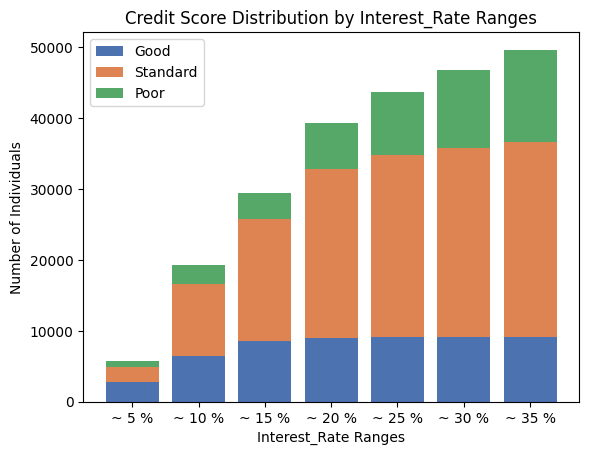

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Interest_Rate1_data = df_train[df_train['Interest_Rate'] < 5]
Interest_Rate2_data = df_train[df_train['Interest_Rate'] < 10]
Interest_Rate3_data = df_train[df_train['Interest_Rate'] < 15]
Interest_Rate4_data = df_train[df_train['Interest_Rate'] < 20]
Interest_Rate5_data = df_train[df_train['Interest_Rate'] < 25]
Interest_Rate6_data = df_train[df_train['Interest_Rate'] < 30]
Interest_Rate7_data = df_train[df_train['Interest_Rate'] < 35]

def categorize_credit_score(df_train):
    good_data = df[df['Credit_Score'] == 0]
    standard_data = df[df['Credit_Score'] == 2]
    poor_data = df[df['Credit_Score']==1]
    return len(good_data), len(standard_data), len(poor_data)

good_counts = []
standard_counts = []
poor_counts = []

for df in [Interest_Rate1_data, Interest_Rate2_data, Interest_Rate3_data, Interest_Rate4_data, Interest_Rate5_data, Interest_Rate6_data, Interest_Rate7_data]:
    good, standard, poor = categorize_credit_score(df_train)
    good_counts.append(good)
    standard_counts.append(standard)
    poor_counts.append(poor)

# 1 ~ 34
# stack bar 그래프 그리기
income_ranges = ['~ 5 %', '~ 10 %', '~ 15 %', '~ 20 %', '~ 25 %', '~ 30 %', '~ 35 %']
labels = ['Good', 'Standard', 'Poor']

plt.bar(income_ranges, good_counts, label='Good')
plt.bar(income_ranges, standard_counts, bottom=good_counts, label='Standard')
plt.bar(income_ranges, poor_counts, bottom=[i+j for i, j in zip(good_counts, standard_counts)], label='Poor')

plt.xlabel('Interest_Rate Ranges')
plt.ylabel('Number of Individuals')
plt.title('Credit Score Distribution by Interest_Rate Ranges')
plt.legend()
plt.show()

# Delay_from_due_date

In [ ]:
df_train['Delay_from_due_date'].describe()

count    49652.000000
mean        18.430778
std         12.108035
min         -5.000000
25%          9.000000
50%         16.000000
75%         26.000000
max         55.000000
Name: Delay_from_due_date, dtype: float64

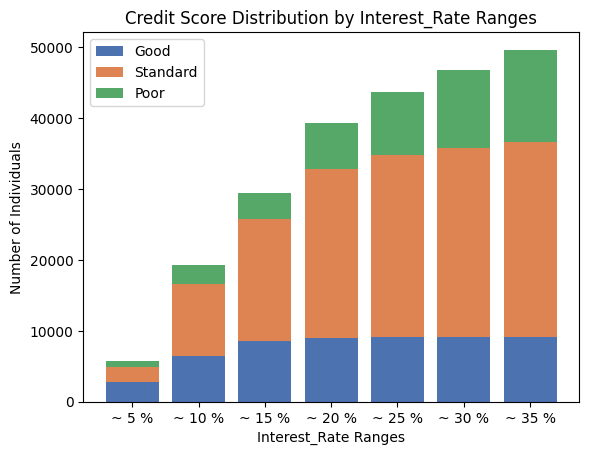

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Interest_Rate1_data = df_train[df_train['Interest_Rate'] < 5]
Interest_Rate2_data = df_train[df_train['Interest_Rate'] < 10]
Interest_Rate3_data = df_train[df_train['Interest_Rate'] < 15]
Interest_Rate4_data = df_train[df_train['Interest_Rate'] < 20]
Interest_Rate5_data = df_train[df_train['Interest_Rate'] < 25]
Interest_Rate6_data = df_train[df_train['Interest_Rate'] < 30]
Interest_Rate7_data = df_train[df_train['Interest_Rate'] < 35]

def categorize_credit_score(df_train):
    good_data = df[df['Credit_Score'] == 0]
    standard_data = df[df['Credit_Score'] == 2]
    poor_data = df[df['Credit_Score']==1]
    return len(good_data), len(standard_data), len(poor_data)

good_counts = []
standard_counts = []
poor_counts = []

for df in [Interest_Rate1_data, Interest_Rate2_data, Interest_Rate3_data, Interest_Rate4_data, Interest_Rate5_data, Interest_Rate6_data, Interest_Rate7_data]:
    good, standard, poor = categorize_credit_score(df_train)
    good_counts.append(good)
    standard_counts.append(standard)
    poor_counts.append(poor)

# -5 ~ 55
# stack bar 그래프 그리기
income_ranges = ['~ 5 %', '~ 10 %', '~ 15 %', '~ 20 %', '~ 25 %', '~ 30 %', '~ 35 %']
labels = ['Good', 'Standard', 'Poor']

plt.bar(income_ranges, good_counts, label='Good')
plt.bar(income_ranges, standard_counts, bottom=good_counts, label='Standard')
plt.bar(income_ranges, poor_counts, bottom=[i+j for i, j in zip(good_counts, standard_counts)], label='Poor')

plt.xlabel('Interest_Rate Ranges')
plt.ylabel('Number of Individuals')
plt.title('Credit Score Distribution by Interest_Rate Ranges')
plt.legend()
plt.show()